## Machine learning (kMeans)

* Acquiring normalized data
* Creating kMeans model (2 clusters - polluted or not polluted)
* Fitting the model
* Predicting the clusters based on the features of the data
* Adding predicted column to the actual dataframe
* Save the prediction for visualization purposes

In [9]:
# Importing the libraries
import pandas as pd
from sklearn.cluster import KMeans

In [10]:
# Machine learning part
# Awaiting access to normalized data to be able to apply the model over it
# I will assume i will get the normalized data into a dataframe object called df

df = pd.read_csv('dataNormalized_file.csv')
df.head()

,eye02.occupancy,eye03.occupancy,eye04.occupancy,eye05.occupancy,eye09.occupancy,eye11.occupancy,eye.humidity.mean,eye.humidity.std,eye.humidity.median,eye.humidity.min,...,gas.co2.median,gas.co2.max,gas.co2.min,gas.co2.iqr,voc.tvoc.mean,voc.tvoc.std,voc.tvoc.median,voc.tvoc.max,voc.tvoc.min,voc.tvoc.iqr
0,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.114754,0.114754,0.114754,...,0.015772,0.019811,0.171082,0.030396,0.099413,0.064585,0.159490,0.051355,0.236364,0.110955
1,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.114754,0.114754,0.114754,...,0.015021,0.021388,0.168874,0.028515,0.102501,0.066478,0.172249,0.051355,0.214545,0.116573
2,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.114754,0.114754,0.114754,...,0.017649,0.019811,0.161148,0.022170,0.099105,0.073316,0.159490,0.052782,0.185455,0.136236
3,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.114754,0.114754,0.114754,...,0.015208,0.019109,0.182119,0.023815,0.101266,0.066526,0.165869,0.054208,0.240000,0.106742
4,0.0,0.0,0.0,0.0,0.0,0.0,0.114754,0.114754,0.114754,0.114754,...,0.011829,0.020863,0.172185,0.023815,0.102192,0.071862,0.154705,0.058012,0.229091,0.113764


In [11]:
# Create the KMeans model
kmeans = KMeans(n_clusters=2, random_state=0)

# Fit the model to the data
kmeans.fit(df)

c:\Users\vladn\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=0)

In [12]:
# Predict clusters
predicted_clusters = kmeans.predict(df)

# Add the predicted clusters to the dataframe
df['Polluted'] = predicted_clusters

print(df.head())

   eye02.occupancy  eye03.occupancy  eye04.occupancy  eye05.occupancy  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0              0.0              0.0   
3              0.0              0.0              0.0              0.0   
4              0.0              0.0              0.0              0.0   

   eye09.occupancy  eye11.occupancy  eye.humidity.mean  eye.humidity.std  \
0              0.0              0.0           0.114754          0.114754   
1              0.0              0.0           0.114754          0.114754   
2              0.0              0.0           0.114754          0.114754   
3              0.0              0.0           0.114754          0.114754   
4              0.0              0.0           0.114754          0.114754   

   eye.humidity.median  eye.humidity.min  ...  gas.co2.max  gas.co2.min  \
0             0.114754       

In [14]:
df.to_csv('dataClustered_file.csv', index=False)

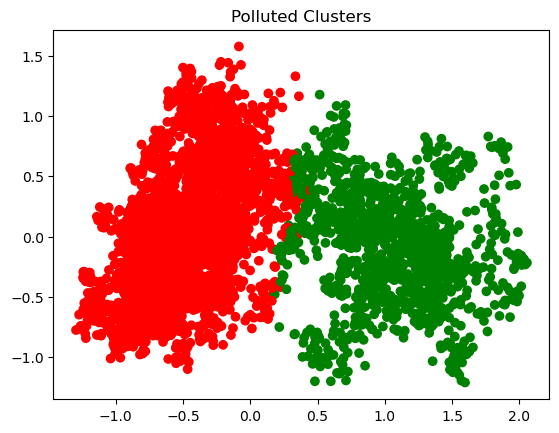

In [15]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Create a color map that maps 0 to red and 1 to blue.
colors = {0:'green', 1:'red'}
# Reduce the data to two dimensions using PCA
pca = PCA(n_components=2, random_state=42)
reduced_data = pca.fit_transform(df.drop('Polluted', axis=1))

# Create a scatter plot of the reduced data
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=df['Polluted'].map(colors))

plt.title('Polluted Clusters')
plt.show()